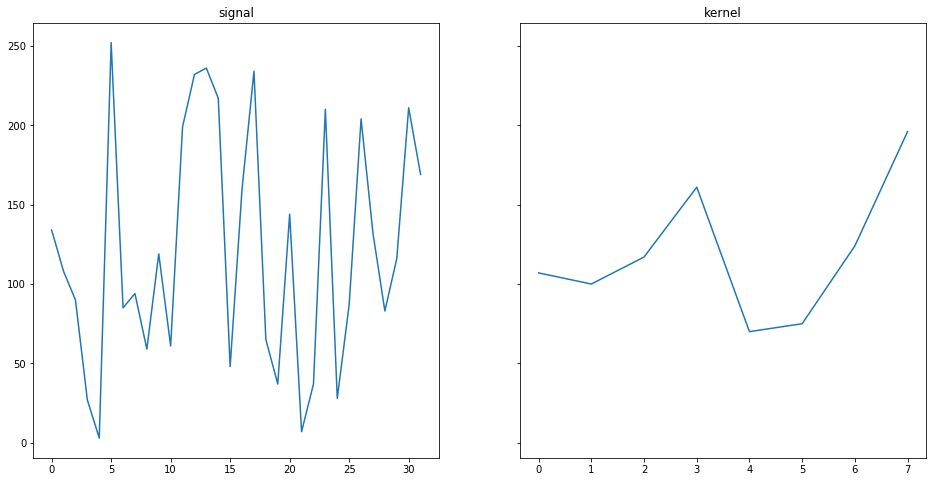

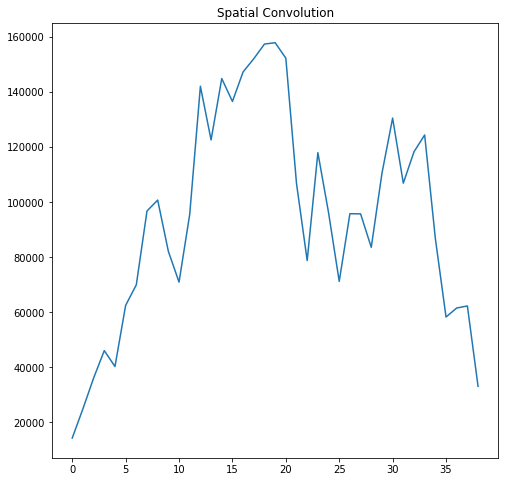

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

###########################################################################################
# Adapted from: <https://pythonexample.com/snippet/convolution-theorempy_binary10_python> #
###########################################################################################

# Initialize a signal.
signal = np.random.randint(0, 255, 2**5) # 32 values.
kernel = np.random.randint(0, 255, 2**3) # 8 values.

# Convolve signal with kernel.
conv = scipy.convolve(signal, kernel)

# Plotting.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

ax1.plot(signal)
ax1.set_title('signal')
ax2.plot(kernel)
ax2.set_title('kernel')

plt.show()

# Plotting.
f, ax1 = plt.subplots(1, 1, figsize=(8, 8), sharey=True)

ax1.plot(conv)
ax1.set_title('Spatial Convolution')

plt.show()

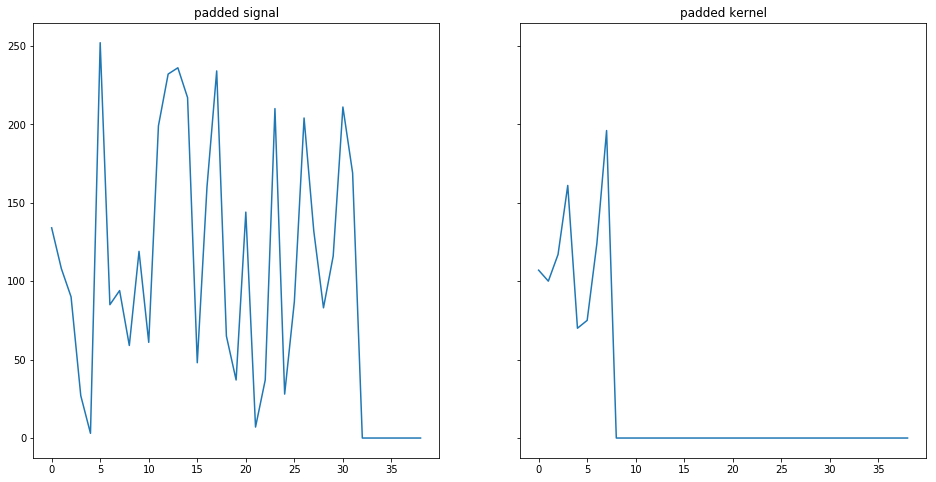

In [3]:
# Copy and pad signal and kernel.
signal_pad = signal.copy()
signal_pad.resize(len(conv), refcheck=False)

kernel_pad = kernel.copy()
kernel_pad.resize(len(conv), refcheck=False)

# Plotting.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

ax1.plot(signal_pad)
ax1.set_title('padded signal')
ax2.plot(kernel_pad)
ax2.set_title('padded kernel')

plt.show()

/Users/jefersson/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


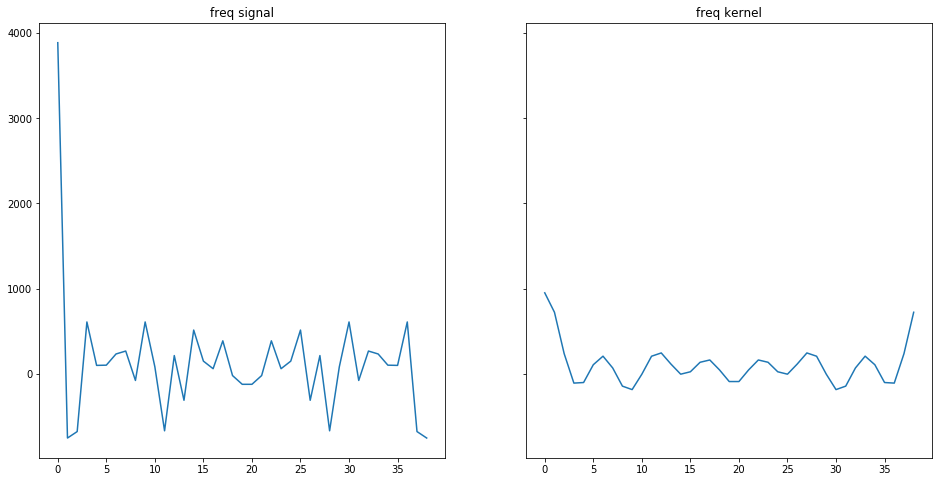

In [4]:
# Compute FFT.
f_signal = scipy.fft(signal_pad)
f_kernel = scipy.fft(kernel_pad)

# Plotting.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

ax1.plot(f_signal)
ax1.set_title('freq signal')
ax2.plot(f_kernel)
ax2.set_title('freq kernel')

plt.show()

/Users/jefersson/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


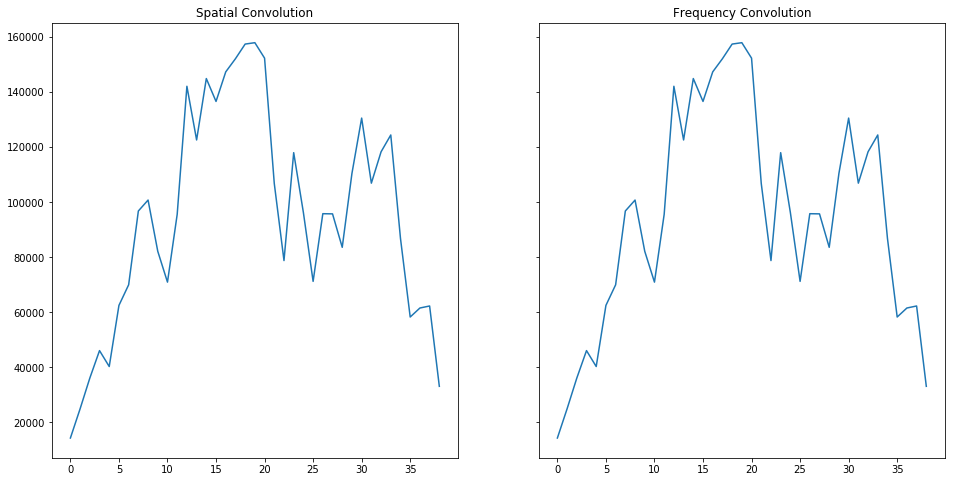

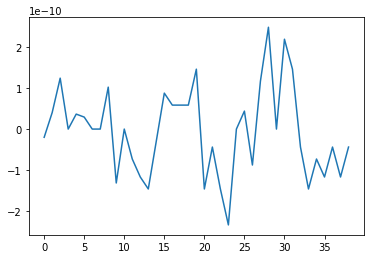

In [5]:
# Inverse FFT of frequency signal.
f_conv = scipy.ifft(f_signal * f_kernel)

# Plotting.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

ax1.plot(conv)
ax1.set_title('Spatial Convolution')
ax2.plot(f_conv)
ax2.set_title('Frequency Convolution')

plt.show()

plt.plot(conv - f_conv)
plt.show()